### MLA FINAL Project 

The theme of the project is showing visualization and analysis of diamond data. It will be good for beginners in jewelry to understand and get an overview of the diamonds information. <br>
The dataset was taken from Kaggle: https://www.kaggle.com/shivam2503/diamonds <br>
It contains attributes of almost 54k rows and 11 columns of diamonds information. <br>
Our target for prediction is <b> Price of diamond </b>

### Data description:

1. Price - the price of diamond
2. Carat - weight of the diamond
3. Cut - quality of the cut (Good, Premium, Ideal)
4. Color - color of the diamond ( D is the best, J - worst)
5. Clarity - measurement of how clear diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x - length of diamond in mm
7. y - width of diamond in mm
8. z - depth of diamond in mm
9. depth - the height of a diamond, measured from the culet to the table, divided by its average girdle diameter
10. table - the width of the diamond's table expressed as a percentage of its average diameter
11. Unnamed: 0 - the numerator of each diamond

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# reading dataset 
df = pd.read_csv('Diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# checking for duplicates and possible null values
# getting the sum of null
df_null = df.isnull().sum()
# getting the sum of duplicates
df_duplicates = df.duplicated().sum()
columns, rows = df.shape
print('The sum of null values in dataset: ')
print(df_null)
print('The sum of duplicates in the dataset: ', df_duplicates)
print('\n')
print('The rows number: ',rows)
print('The columns number: ',columns)

The sum of null values in dataset: 
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
The sum of duplicates in the dataset:  0


The rows number:  11
The columns number:  53940


There is no any missed value or duplicate in the dataset and we can see that 'Unnamed: 0' is unnecessary column and we will drop it.

In [4]:
# dropping unneccassary column
df = df.drop('Unnamed: 0',axis = 1)

In [5]:
# getting descriptive statistics about the data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Some conclusion:
1. Average diamond weight (carat) is 0.79
2. Averagee price for diamond is 3932.79 dollars
3. The average length of diamond is 5.73 mm

### Data visualization

In [6]:
# Let's make some visualization based on the color of diamond
# getting the sum of diamons per cut 
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

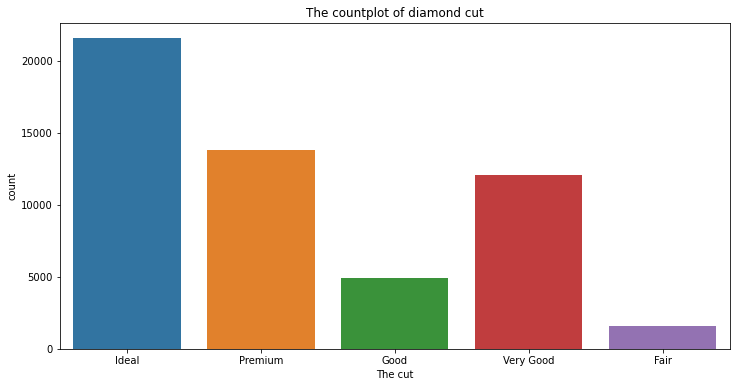

In [7]:
# getting the countplot of diamond cut
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(data = df,x = 'cut');
plt.title('The countplot of diamond cut');
plt.xlabel('The cut')
plt.show()

From the given countplot,the ideal cut is the most frequent in the dataset, while the fair one is the least one. So, it means that in the dataset, the quality of diamonds are ideal. 

In [8]:
# getting grouped price about the cuts 
df_cut = df.groupby('cut',as_index = False)[['price','carat']].agg('sum').sort_values(by = 'price', ascending = False)
# getting the mean price per each cut
df_cut['price'] = df_cut['price']/len(df)
df_cut['carat'] = df_cut['carat']/len(df)
df_cut

,cut,price,carat
2,Ideal,1381.414294,0.280809
3,Premium,1172.070782,0.228049
4,Very Good,891.872877,0.180621
1,Good,357.341657,0.077236
0,Fair,130.100111,0.031225


For Ideal cut, the average price is equal to 1381 dollar, while for fair, it is equal to 130 dollars. Moreover, as the cut of diamond decrease, the price and carat of the diamond also decrease, which means that cut of diamond positively affect on the price and carat.

In [9]:
# Now let's visualize the diamond clarity info
df_clarity = df.clarity.value_counts(ascending = False)
df_clarity

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Let's not forget the clarity info, where I1 will be the worst), SI2, SI1, VS2, VS1, VVS2, VVS1 and IF one will be the best. So, we can see that the SI1 is the most frequent one, that is the average clearness, while the worst clarity type is the least one among diamonds.

In [10]:
# getting the pivot table of each clarity and cut
# where frequency of each cut along with its clarity will be presented
table = pd.pivot_table(df,columns = ['cut'],index = ['clarity'],aggfunc = 'size')
table

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,210,96,146,205,84
IF,9,71,1212,230,268
SI1,408,1560,4282,3575,3240
SI2,466,1081,2598,2949,2100
VS1,170,648,3589,1989,1775
VS2,261,978,5071,3357,2591
VVS1,17,186,2047,616,789
VVS2,69,286,2606,870,1235


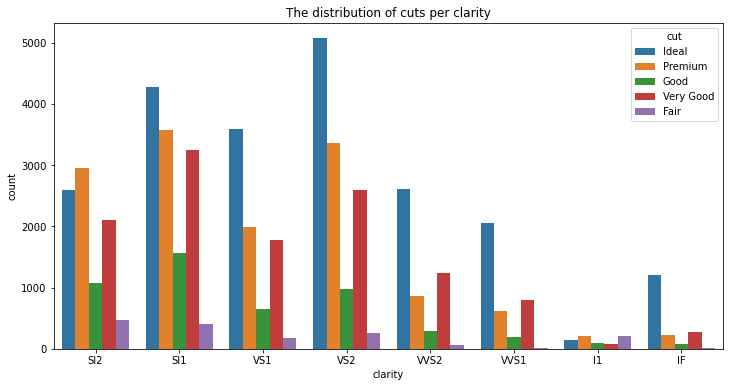

In [11]:
# showing the distribution of cuts per clarity
plt.subplots(figsize = (12,6))
sns.countplot(data = df, x = 'clarity',hue = 'cut');
plt.title('The distribution of cuts per clarity');

From the results above, the ideal cuts are the most frequent among VS2, which represents average clearness of diamonds, while the fair the SI2 has the biggest number of least quality of cut which is Fair.

In [12]:
# getting the ratio of each clarity among with its cut
df.groupby(['clarity'])['cut'].value_counts(normalize = True)

clarity  cut      
I1       Fair         0.283401
         Premium      0.276653
         Ideal        0.197031
         Good         0.129555
         Very Good    0.113360
IF       Ideal        0.677095
         Very Good    0.149721
         Premium      0.128492
         Good         0.039665
         Fair         0.005028
SI1      Ideal        0.327746
         Premium      0.273632
         Very Good    0.247991
         Good         0.119403
         Fair         0.031228
SI2      Premium      0.320753
         Ideal        0.282576
         Very Good    0.228410
         Good         0.117577
         Fair         0.050685
VS1      Ideal        0.439236
         Premium      0.243422
         Very Good    0.217232
         Good         0.079305
         Fair         0.020805
VS2      Ideal        0.413689
         Premium      0.273862
         Very Good    0.211372
         Good         0.079785
         Fair         0.021292
VVS1     Ideal        0.560055
         Very Good  

The ratio of Ideal cut among the clarity was the highest in IF with 0.677 (which is also the best quality), while in VS2 which showed that Ideal was the most frequent one, it is only 41.3%. 

In [13]:
# getting grouped price for different diamond colors
df_colors = df.groupby('color',as_index = False)[['price']].agg('sum').sort_values(by = 'price', ascending = True)
df_colors

,color,price
6,J,14949281
0,D,21476439
5,I,27608146
1,E,30142944
2,F,35542866
4,H,37257301
3,G,45158240


Text(0.5, 1.0, 'The distribution of prices by diamond colors')

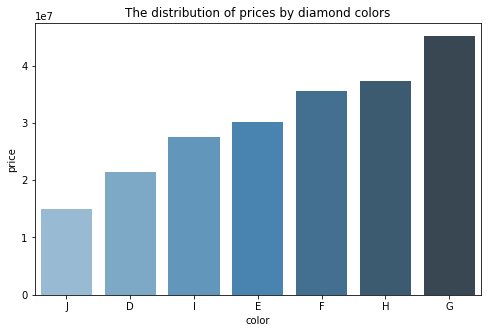

In [14]:
# the distribution of prices by diamond color
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='color', y='price', data=df_colors, palette='Blues_d')
plt.title('The distribution of prices by diamond colors')

As can be seen from the barplot above, 'G' color has the highest price among all others, while 'J' as being the worst one has the lowest price.

In [15]:
# print('Maximum: ')
# print(df[['carat', 'price']].max())
# print('Minimum: ')
# print(df[['carat', 'price']].min())
# print('Average: ')
# print(df[['carat', 'price']].mean())

df[['carat', 'price']].agg(['max', 'min', 'mean'])

,carat,price
max,5.01000,18823.000000
min,0.20000,326.000000
mean,0.79794,3932.799722


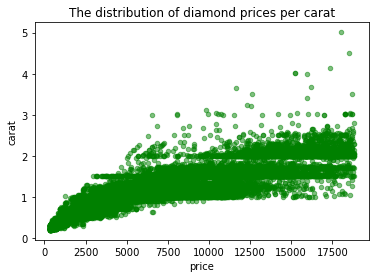

In [16]:
# scatter plot for price and carat
df.plot(x='price', y='carat', kind = 'scatter', alpha = 0.5, color='green')
plt.title('The distribution of diamond prices per carat')
plt.show()

The scatter plot shows the distribution of prices by carat. From the plot above, we can claim that the more the weight of the diamond (carat), the highest price it obtain. For instance, 
+ the average price for the diamonds in the dataset is almost 4000.
+ the minimum price is 326, while the maximum price is more than 18000.

### Data preprocessing

In [17]:
# Let's make dummy variables of columns
df = pd.get_dummies(df,drop_first = True)
df.shape

(53940, 24)

Now, there are 24 columns, while initially it was 11 columns.

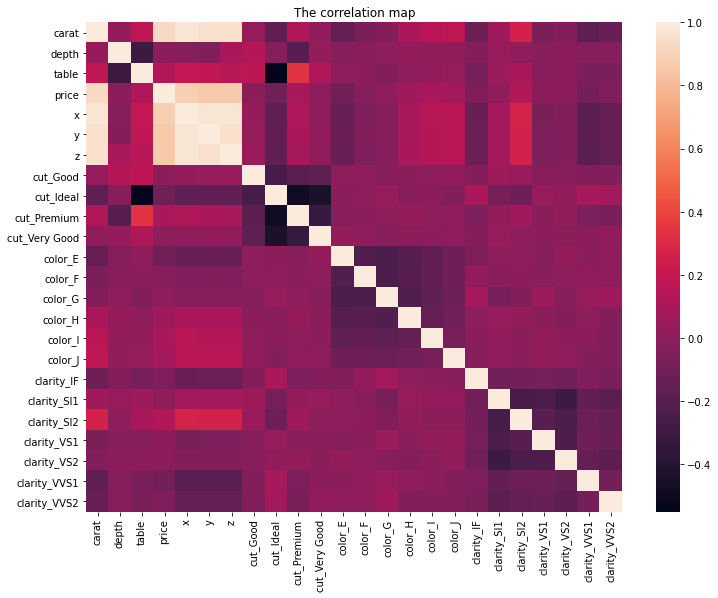

In [18]:
# visualization of columns correlation
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr());
plt.title('The correlation map');

### Random Forest Regressor

In [19]:
# applying RFR on highly correlated variables
from sklearn.ensemble import RandomForestRegressor

X = df[['x','y','z','carat']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

model = RandomForestRegressor(n_estimators = 2, random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# r2_score of random forest regressor
print(r2_score(y_pred,y_test))

0.8209559847964525


The model with high correlated data gave us 82.1% accuracy. Now, let's try to use our preprocessed data with PCA

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Applying PCA and Random forest
pca = PCA(n_components = 4)
sc = StandardScaler()
model = RandomForestRegressor(n_estimators = 2, random_state = 0)
X = df.drop('price',axis=1)
y = df['price']
# Feature extraction
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(r2_score(y_pred,y_test))

0.8167582524998416


In [21]:
# applying RFR on preprocessed data
from sklearn.ensemble import RandomForestRegressor

X = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

model = RandomForestRegressor(n_estimators = 2, random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# r2_score of random forest regressor
print(r2_score(y_pred,y_test))

0.9545398153348985


The results of that model is quite better (95.5%) than the ones shown above.

## Conclusion

In this project, I performed an analysis of the diamond data, which is quite interesting to study. The main goal here was to predict the price based on the given attributes. 

For the visualization part I have included the following plots:
    1. The countplot of diamond cut
    2. The distribution of cuts per clarity
    3. The distribution of prices by diamond color
    4. The scatter plot for price and carat attributes
    
In this project work, I applied Random Forest Regressor
    
The accuracy scores for the Random Forest Regressor is 95.5% which is quite good.